In [2]:
# Matrix Factorization with Bias
import numpy as np
import random
def grad_U(Ui, Yij, Vj, reg, eta, a, b):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    s = np.dot(Vj, (Yij - np.dot(Ui, Vj) - a - b ))
    return eta * (np.dot(reg, Ui) - s)


def grad_V(Vj, Yij, Ui, reg, eta, a, b):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    
    s = np.dot(Ui, (Yij - np.dot(Ui, Vj) - a - b ))
    return eta * (np.dot(reg, Vj) - s)


def grad_A(Vj, Yij, Ui, reg, eta, a, b):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to a multiplied by eta.
    """
    s = (Yij - np.dot(Ui, Vj) - a - b )
    return -eta * (s - (reg * a))
    
def grad_B(Vj, Yij, Ui, reg, eta, a, b):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to b multiplied by eta.
    """
    s = Yij - np.dot(Ui, Vj) - a - b 
    return -eta * (s - (reg * b))
    
    
    
def get_err(U, V, Y, A, B, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T 
    with the bias terms included.
    """
    err = 0.0
    for k in range(len(Y)):
        i, j, sign = Y[k]
        curr1 = np.dot(U[i-1], V[j-1]) + A[i-1] + B[j-1]
        err += .5 * ((sign - curr1) ** 2)
    return err / len(Y)
    
# Perform the (Yij - mean) part of the optimation function by offsetting each term by average.
def center(train, test):
    avg = np.mean(train[:,2])
    train[:,2] = train[:,2 ] - avg
    test[:,2] = test[:, 2] - avg
    

def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV^T)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err, A, B) consisting of U, V, and the unregularized MSE
    of the model, and the bias A, B
    """
    itr = 0
    U = np.random.uniform(-0.5, 0.5, (M, K))
    V = np.random.uniform(-0.5, 0.5, (N, K))
    # Bias terms A, B
    A = np.random.uniform(-0.5, 0.5, (M))
    B = np.random.uniform(-0.5, 0.5, (N))
    # get initial loss
    ind = list(range(len(Y)))
    shuffled = np.random.permutation(ind)
    curr_loss = get_err(U, V, Y, A, B)
    for k in range(len(Y)):
        ind = shuffled[k]
        i, j, Yij = Y[ind]
        
        # update U, V, A, B
        u = grad_U(U[i-1], Yij, V[j-1], reg, eta, A[i-1], B[j-1])
        v = grad_V(V[j-1], Yij, U[i-1], reg, eta, A[i-1], B[j-1])
        a = grad_A(V[j-1], Yij, U[i-1], reg, eta, A[i-1], B[j-1])
        b = grad_B(V[j-1], Yij, U[i-1], reg, eta, A[i-1], B[j-1])
        U[i-1] = U[i-1] - u 
        V[j-1] = V[j-1] - v
        A[i-1] = A[i-1] - a
        B[j-1] = B[j-1] - b
    
    
        
    next_loss = get_err(U, V, Y, A, B)
    init = curr_loss - next_loss
    curr_delta = init
    curr_loss = next_loss
    
    while itr < max_epochs and (curr_delta / init) > eps:
        ind = list(range(len(Y)))
        shuffled = np.random.permutation(ind)
        for k in range(len(Y)):
            ind = shuffled[k]
            ii, jj, Yij = Y[ind]
            i = int(ii)
            j = int(jj)
            # update U, V, A, B
            u = grad_U(U[i-1], Yij, V[j-1], reg, eta, A[i-1], B[j-1])
            v = grad_V(V[j-1], Yij, U[i-1], reg, eta, A[i-1], B[j-1])
            a = grad_A(V[j-1], Yij, U[i-1], reg, eta, A[i-1], B[j-1])
            b = grad_B(V[j-1], Yij, U[i-1], reg, eta, A[i-1], B[j-1])
            U[i-1] = U[i-1] - u 
            V[j-1] = V[j-1] - v
            A[i-1] = A[i-1] - a
            B[j-1] = B[j-1] - b
        next_loss = get_err(U,V,Y, A,B)
        
        curr_delta = curr_loss - next_loss
        curr_loss = next_loss
        itr += 1
        
    print(curr_loss, itr)
    return U, V, curr_loss, A, B






In [21]:
# Find optimal lambda and stopping criteria
import numpy as np
import matplotlib.pyplot as plt

Y_train = np.loadtxt('train.txt').astype(int)
Y_test = np.loadtxt('test.txt')	.astype(int)
center(Y_train, Y_test)
M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
K = 20
eps = [.0001, 0.001, 0.01]

regs = [0, 10**-4, 10**-2, 10**-1, 1]
eta = 0.03 # learning rate
E_ins = []
E_outs = []

# Use to compute Ein and Eout
for reg in regs:
    E_ins_for_lambda = []
    E_outs_for_lambda = []
    
    for ep in eps:
        print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s, eps = %s"%(M, N, K, eta, reg, ep))
        U,V, e_in, A, B = train_model(M, N, K, eta, reg, Y_train, eps=ep)
        E_ins_for_lambda.append(e_in)
        eout = get_err(U, V, Y_test, A, B)
        E_outs_for_lambda.append(eout)

    E_ins.append(E_ins_for_lambda)
    E_outs.append(E_outs_for_lambda)







Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0, eps = 0.0001
0.06800054483567393 54
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0, eps = 0.001
0.07463360874466021 32
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0, eps = 0.01
0.09038193493290478 15
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.0001, eps = 0.0001
0.0693627723190587 48
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.0001, eps = 0.001
0.07326186198600289 36
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.0001, eps = 0.01
0.09596207509044713 13
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.01, eps = 0.0001
0.07046433731210561 59
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.01, eps = 0.001
0.07468368550120685 42
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.01, eps = 0.01
0.09743612652528211 14
Training model with M = 943, N = 1682, k = 20, eta

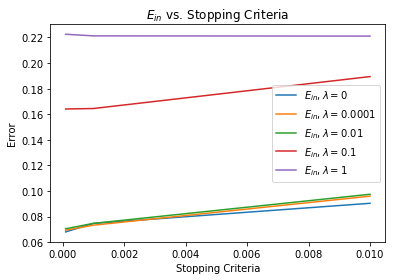

In [26]:
# Plot values of E_in across stopping criteria for each value of lambda
for i in range(len(regs)):
    plt.plot(eps, E_ins[i], label='$E_{in}, \lambda=$'+str(regs[i]))
plt.title('$E_{in}$ vs. Stopping Criteria')
plt.xlabel('Stopping Criteria')
plt.ylabel('Error')
plt.legend()
plt.savefig('ein2.png')	
plt.show()

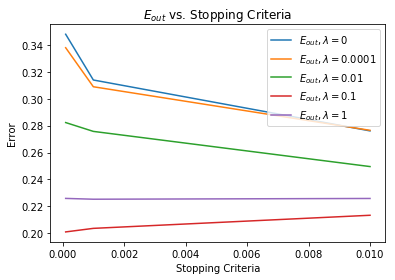

<Figure size 432x288 with 0 Axes>

In [27]:
# Plot values of E_out across stopping criteria for each value of lambda
for i in range(len(regs)):
    plt.plot(eps, E_outs[i], label='$E_{out}, \lambda=$'+str(regs[i]))
plt.title('$E_{out}$ vs. Stopping Criteria')
plt.xlabel('Stopping Criteria')
plt.ylabel('Error')
plt.legend()	
plt.show()
plt.savefig('eout2.png')		



In [3]:
# Find optimal learning rate using the found stopping criteria and lambda
import numpy as np
import matplotlib.pyplot as plt

		

Y_train = np.loadtxt('train.txt').astype(int)
Y_test = np.loadtxt('test.txt')	.astype(int)
center(Y_train, Y_test)
M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
K = 20
eps = 0.001

regs = .1
etas = [0.01, 0.03, 0.07, 0.1, 0.15] # learning rate
E_ins2 = []
E_outs2 = []

# Use to compute Ein and Eout
for eta in etas:
    U,V, e_in, A, B = train_model(M, N, K, eta, regs, Y_train, eps=eps)
    E_ins2.append(e_in)
    E_outs2.append(get_err(U, V, Y_test, A, B))
    

0.18613089849875358 13
0.16163401564929913 33
0.17329519554004222 13
0.17790010559660627 14
0.19563325208216262 9


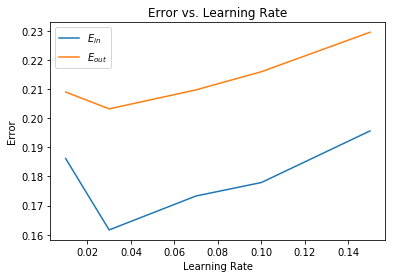

In [4]:
# Plot Error vs Learning Rate
plt.plot(etas, E_ins2, label='$E_{in}$')
plt.plot(etas, E_outs2, label='$E_{out}$')
plt.title('Error vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Error')
plt.legend()
plt.savefig('e_learn2.png')	
plt.show()

In [14]:
# Find U, V using the learning rate, lambda, stopping criteria parameters we found
import numpy as np
import matplotlib.pyplot as plt

Y_train = np.loadtxt('train.txt').astype(int)
Y_test = np.loadtxt('test.txt')	.astype(int)
center(Y_train, Y_test)
M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
K = 20

U, V, e_in, A, B = train_model(M, N, K, .03, .1, Y_train, eps=.001)


0.18525998502424038 15


In [15]:
print(get_err(U, V, Y_test, A, B))

0.20723028956973036


In [22]:
np.savetxt("U2.txt", U)
np.savetxt("V2.txt", V)
np.savetxt("A2.txt", A)
np.savetxt("B2.txt", B)